# ***Roles para arrumar:***

> 1c) = é um multigraph

> 2 = ta tudo errada na leitura

> 4= b 

>5

# PROJETO 2
> # **Bruner Eduardo Augusto - NUSP:9435846**
> # **William Luis Alves Ferreira - NUSP:9847599**

In [1]:
# para rodar no colab
#!pip uninstall networkx -y
#!pip install networkx==2.3
import networkx
networkx.__version__

'2.3'

In [2]:
#Adicionando biblioteca "nx@networkx" para gerenciamento e produção de graficos 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import math as mt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import warnings
import networkx.algorithms.community as nx_comm
import os as os

from numpy  import *
from scipy.linalg import expm
from scipy.stats import moment
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import normalized_mutual_info_score
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
#from community import community_louvain
#from google.colab import drive

warnings.filterwarnings('ignore')
np.random.seed(50)
#drive.mount('/content/drive/')
#definindo dimesões padrão para plot
plt.rcParams['figure.figsize'] = (11,7)

def plot_grafo(grafo):
    plots = nx.spring_layout(grafo)
    nx.draw(grafo, with_labels = True, node_size=1, font_size=10, pos = plots)
    plt.show(True)

# **Questão 1**

In [3]:
#Funções utilizadas para a resolução do exercício

#Função para obter-se o menor componente de um grafo
def m_componente(G):
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True) #obtém o maior componente da rede
    G=Gcc[0]
    return G

#Random Walk Accessibility
def RWA(G):
    N = len(G) #N é o número de nós do grafo
    vk = dict(G.degree())
    vk = list(vk.values()) #vk é a lista com os valores dos graus dos nós
    A = nx.adjacency_matrix(G) #obtém a matriz de adjacência de G
    P = np.zeros((N,N), dtype = 'float') #cria uma matriz vazia para receber os valores das probailidades de transição
    #obtendo-se a matriz de probabilidades de transição de G
    for i in np.arange(0, N): #laços para iteração em uma matriz simétrica
        for j in np.arange(0, N):
            P[i,j] = A[i,j]/vk[i] #obtém os valores de probabilidade de transição
            P[j,i] = P[i,j] #a matriz é simétrica, portando P(i,j) é igual a P(j,i)
    P2 = expm(P)/np.exp(1) #obtém o valor do quociente do número de Euler elevado à matriz P e o número de Euler elevado à 1
    vacc = np.zeros(N, dtype = float) #vetor de zeros para posteriormente armazenar os valores finais de acessibilidade
    for i in np.arange(0, N): #iteração para a obtenção da acessibilidade a partir de P2
        acc = 0 #valor iniciual de acc
        for j in np.arange(0,N):
            if(P2[i,j] > 0): #garante que os valores de probabilidades são positivos
                acc = acc + P2[i,j]*mt.log(P2[i,j]) #obtém o somatório que computa a acessibilidade (valor negativo)
        acc = np.exp(-acc) #obtém o valor positivo da acc
        vacc[i] = acc #transfere os valores de acc para o vetor que foi criado antes dos laços de iteração
    return vacc

#Communicability Centrality
def Com_Centrality(G):
    # tembém é necessário obter a matriz adjacências para calcuar-se esta medida de centralidade 
    N = len(G) #N é o número de nós do grafo
    vk = dict(G.degree())
    vk = list(vk.values()) #vk é a lista com os valores dos graus dos nós
    A = nx.adjacency_matrix(G) #obtém a matriz de adjacência de G
    A2 = expm(A) # a matriz A2 è definida como o número de Euler elevado à matriz de adjacências A
    vcom = np.zeros(N, dtype = float) # tal vetor irá receber os valores da centrtalidade na iteração abaixo
    #a communicability centrality é definida como a diagonal principal da matriz A2, assim, basta obter tais valores
    for i in np.arange(0,N):
        vcom[i] = A2[i,i] #valores da diagonal principal de A2
    return vcom

# Construção da matrix de correlação entre as medidas Centrality
def mtrxCrrlc(d,CLC, B, EC, PR, KC, ACC, COM):
    #agora, basta utilizar a biblioteca pandas para criar um dataframedos valores obtidos e com tal dataframe obter a matriz de correlações
    df = pd.DataFrame({'K':d,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC, 'ACC':ACC, 'COM': COM})
    #rotina para imprimir-se a matriz de correlações utilizando-se da biblioteca matplotlib
    corr = df.corr() #obtém os valores das correlações do dataframe
    plt.figure(figsize=(9,9))
    plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical', fontsize=20)
    plt.yticks(range(len(corr)), corr.columns, fontsize=20);
    plt.suptitle('Correlação entre as medidas de centralidade', fontsize=20)
    plt.grid(False)
    plt.show()

**a)** 	E-road	network

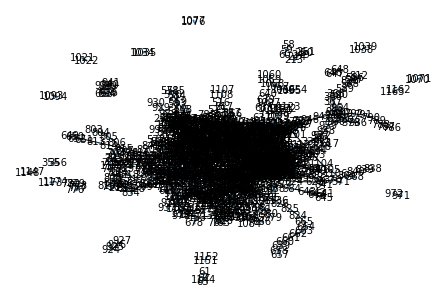

In [4]:
road = nx.read_edgelist("./DATA/subelj_euroroad/out.subelj_euroroad_euroroad", nodetype=int , comments  = "%")
plot_grafo(road)

In [5]:
# [i] Degree Centrality
d = dict(road.degree())  
d = list(d.values())

In [6]:
#[ii] K-Core Centrality
KC = dict(nx.core_number(road)) 
KC = list(KC.values())

In [7]:
#[iii] Closeness Centrality
CLC = dict(nx.closeness_centrality(road)) 
CLC = list(CLC.values()) 

In [8]:
#[iv] Betweenness Centrality
B = dict(nx.betweenness_centrality(road))
B = list(B.values())

In [9]:
#[v] Eigenvector Centrality
EC = dict(nx.eigenvector_centrality(road, max_iter = 1000)) #eigenvector centrality com 1000 como nùmero máximo de iterações
EC = list(EC.values())

In [10]:
#[vi] Pagerank
PR = dict(nx.pagerank(road, alpha=0.85))
PR = list(PR.values())

In [11]:
#[vii] Random Walk Accessibility
ACC = list(RWA(road)) #obtém os valores de acessibilidade pela função RWA

In [12]:
#[viii] Communicability Centrality
COM = list(Com_Centrality(road)) #obtém-se os valores da communicability centrality pela função Com_Centrality

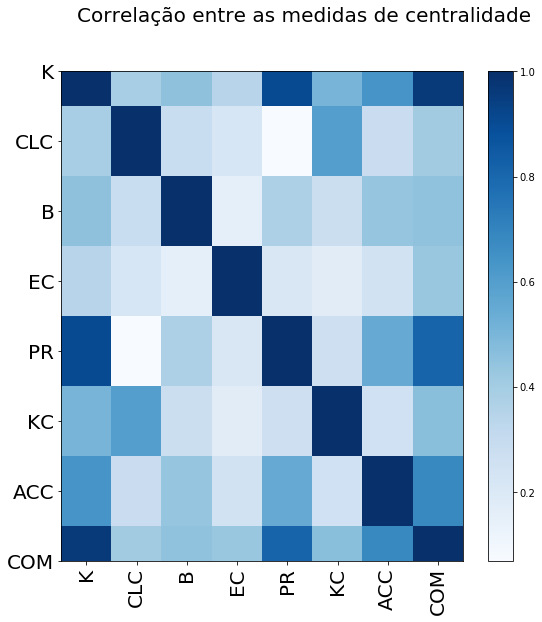

In [13]:
# Matrix de Correlação entre as medidas Centrality
mtrxCrrlc(d, CLC, B, EC, PR, KC, ACC, COM)

**b)** Hamsterster	friendships

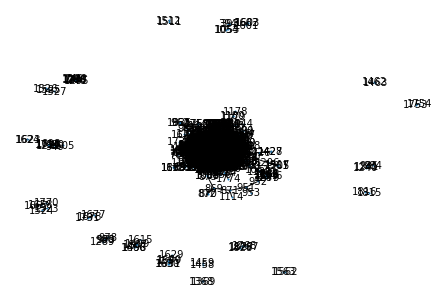

In [14]:
hams = nx.read_edgelist("./DATA/hamster/out.petster-friendships-hamster-uniq", nodetype=int ,comments  = "%")
plot_grafo(hams)

In [15]:
# [i] Degree Centrality
d = dict(hams.degree())  
d = list(d.values())

In [16]:
#[ii] K-Core Centrality
KC = dict(nx.core_number(hams)) 
KC = list(KC.values())

In [17]:
#[iii] Closeness Centrality
CLC = dict(nx.closeness_centrality(hams)) 
CLC = list(CLC.values()) 

In [18]:
#[iv] Betweenness Centrality
B = dict(nx.betweenness_centrality(hams))
B = list(B.values())

In [19]:
#[v] Eigenvector Centrality
EC = dict(nx.eigenvector_centrality(hams, max_iter = 1000)) #eigenvector centrality com 1000 como nùmero máximo de iterações
EC = list(EC.values())

In [20]:
#[vi] Pagerank
PR = dict(nx.pagerank(hams, alpha=0.85))
PR = list(PR.values())

In [21]:
#[vii] Random Walk Accessibility
ACC = list(RWA(hams)) #obtém os valores de acessibilidade pela função RWA

In [22]:
#[viii] Communicability Centrality
COM = list(Com_Centrality(hams)) #obtém-se os valores da communicability centrality pela função Com_Centrality

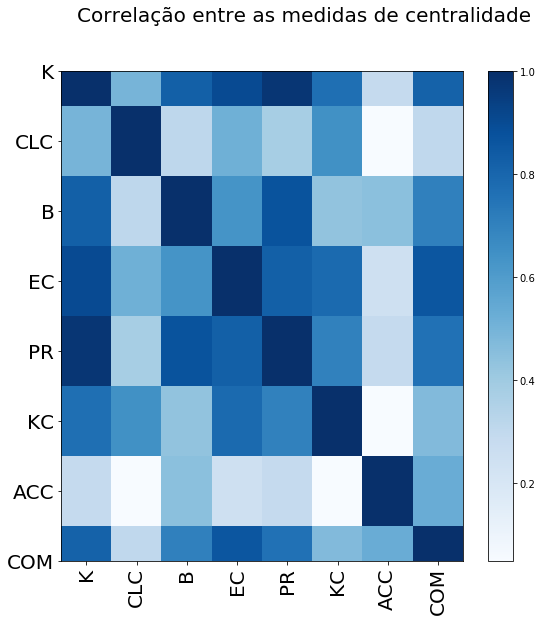

In [23]:
# Matrix de Correlação entre as medidas Centrality
mtrxCrrlc(d, CLC, B, EC, PR, KC, ACC, COM)

**c)** 		C. Elegans	neural	network	

In [24]:
#Role para tentar ler o grafico ... MAs não deu certo, desconsidere 
#path = os.path.expanduser("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/")
#filename = 'celegansneural.gml'
#graph = nx.read_gml(os.path.join(path, filename))
#plot_grafo(graph)

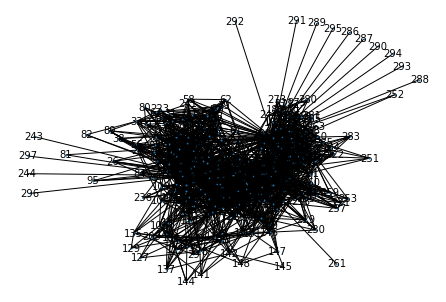

In [25]:
neural = nx.read_weighted_edgelist("./DATA/celegansneural.mtx", nodetype=int,comments  = "%")
neural.remove_edges_from(nx.selfloop_edges(neural)) # permite o calculo do K-Core Centrality e Random Walk Accessibility
plot_grafo(neural)

In [26]:
# [i] Degree Centrality
d = dict(neural.degree())  
d = list(d.values())

In [27]:
#[ii] K-Core Centrality
KC = dict(nx.core_number(neural)) 
KC = list(KC.values())

In [28]:
#[iii] Closeness Centrality
CLC = dict(nx.closeness_centrality(neural)) 
CLC = list(CLC.values()) 

In [29]:
#[iv] Betweenness Centrality
B = dict(nx.betweenness_centrality(neural))
B = list(B.values())

In [30]:
#[v] Eigenvector Centrality
EC = dict(nx.eigenvector_centrality(neural, max_iter = 1000)) #eigenvector centrality com 1000 como nùmero máximo de iterações
EC = list(EC.values())

In [31]:
#[vi] Pagerank
PR = dict(nx.pagerank(neural, alpha=0.85))
PR = list(PR.values())

In [32]:
#[vii] Random Walk Accessibility
ACC = list(RWA(neural)) #obtém os valores de acessibilidade pela função RWA

In [33]:
#[viii] Communicability Centrality
COM = list(Com_Centrality(neural))

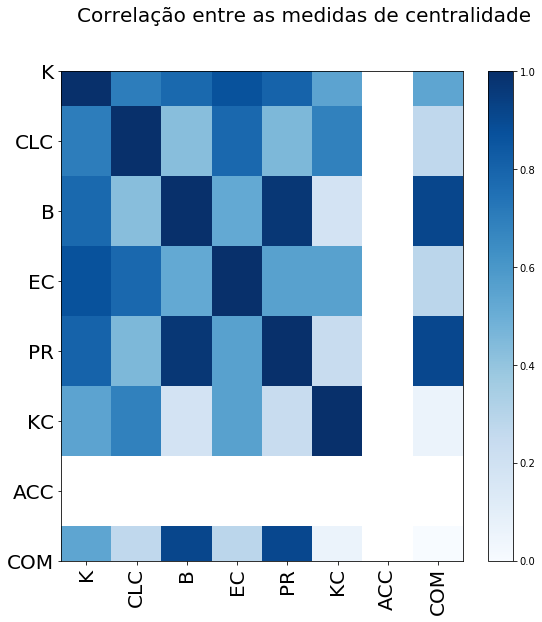

In [34]:
# Matrix de Correlação entre as medidas Centrality
mtrxCrrlc(d, CLC, B, EC, PR, KC, ACC, COM)

**d)** US	airport	network

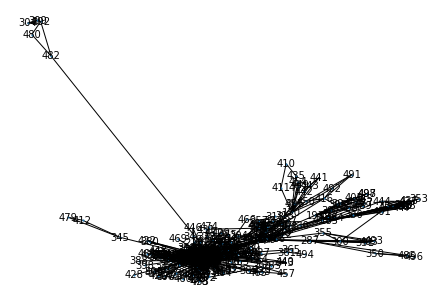

In [35]:
usairport = nx.read_weighted_edgelist("./DATA/USairport500.txt", nodetype=int,comments  = "%")
plot_grafo(usairport)

In [36]:
# [i] Degree Centrality
d = dict(usairport.degree())  
d = list(d.values())

In [37]:
#[ii] K-Core Centrality
KC = dict(nx.core_number(usairport)) 
KC = list(KC.values())

In [38]:
#[iii] Closeness Centrality
CLC = dict(nx.closeness_centrality(usairport)) 
CLC = list(CLC.values()) 

In [39]:
#[iv] Betweenness Centrality
B = dict(nx.betweenness_centrality(usairport))
B = list(B.values())

In [40]:
#[v] Eigenvector Centrality
EC = dict(nx.eigenvector_centrality(usairport, max_iter = 1000)) #eigenvector centrality com 1000 como nùmero máximo de iterações
EC = list(EC.values())

In [41]:
#[vi] Pagerank
PR = dict(nx.pagerank(usairport, alpha=0.85))
PR = list(PR.values())

In [42]:
#[vii] Random Walk Accessibility
ACC = list(RWA(usairport)) #obtém os valores de acessibilidade pela função RWA

In [43]:
#[viii] Communicability Centrality
COM = list(Com_Centrality(usairport)) #obtém-se os valores da communicability centrality pela função Com_Centrality

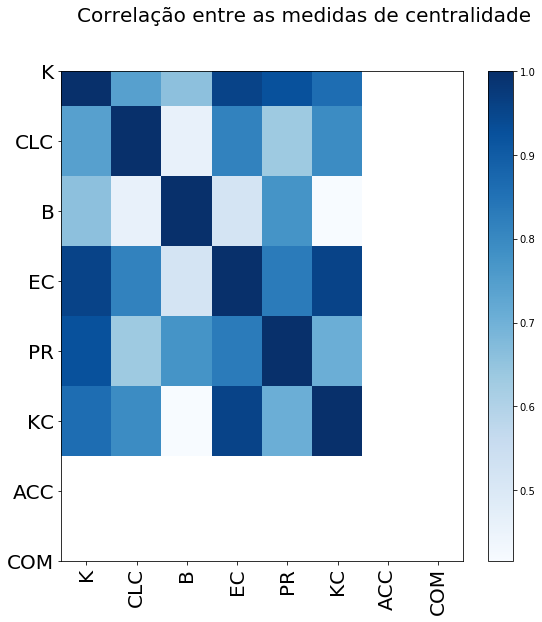

In [44]:
# Matrix de Correlação entre as medidas Centrality
mtrxCrrlc(d, CLC, B, EC, PR, KC, ACC, COM)

***Discução e interpretação dos resultados*** 

> Vemos vizualmente que todas as redes possuem caracteristicas heterogenia, ou seja, nós com alto grau de relação tendem a se conectar entre si, desta formas todas as métricas utilizadas nesse tópico reforçam essa caracterisca. Partindo da analise de dominio todas as quatro redes possuem as caracteristicas de suas respectivivas categorias e todas possuem alta Assortiviades, assim colaborando com a heterogenia das redes.



# **Questão 2**

In [91]:
#Funções utilizadas para a resolução do exercício

# Degree Histogram
def plot_degree_hist(G):
    #obtendo-se uma lista com os valores das centralidades de grau de cada vértice da rede G
    d = dict(G.degree())
    d = list(d.values())
    #rotina para plotar-se o histograma de d
    plt.figure(figsize=(7,5))
    plt.hist(d, density=True)
    plt.title("Distribution of the Degree Centrality", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.xlabel("Degree Centrality (k)", fontsize=20)
    plt.show(True)

# Closeness Centrality Histogram
def plot_closeness_hist(G):
    #obtendo-se a lista dos valores de closeness centrality de cada vértice da rede G
    CLC = dict(nx.closeness_centrality(G)) 
    print("terminou closeness")
    CLC = list(CLC.values())
    #rotina para plotar-se o histograma de CLC
    plt.figure(figsize=(7,5))
    plt.hist(CLC, density=True)
    plt.title("Distribution of the Closeness Centrality", fontsize=20)
    plt.ylabel("P(CLC)", fontsize=20)
    plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
    plt.show(True)

# Betweenness Centrality Histogram
def plot_betweenness_hist(G):
    #obtendo-se a lista dos valores de betweenness centrality de cada vértice da rede G
    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    
    #rotina para plotar-se o histograma de B
    plt.figure(figsize=(7,5))
    plt.hist(B, density=True)
    plt.title("Distribution of the Betweenness Centrality", fontsize=20)
    plt.ylabel("P(B)", fontsize=20)
    plt.xlabel("Betweenness Centrality (B)", fontsize=20)
    plt.show(True)

***First_City***

In [92]:
#Pegando a rede da First_City para montar os histogramas

# leitura no drive do grupo : 
First_City =  nx.read_graphml("./DATA/data-cities/Sao_Paulo.graphml.xml")
#plot_grafo(First_City)

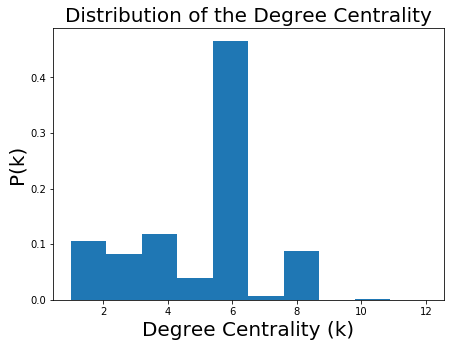

In [47]:
#[i] Degree Histogram
plot_degree_hist(First_City)

In [93]:
#[ii] Closeness Centrality Histogram
plot_closeness_hist(First_City)

KeyboardInterrupt: 

In [ ]:
#[iii] Betweenness Centrality Histogram
plot_betweenness_hist(First_City)

***Second_City***

In [50]:
#Pegando a rede da First_City para montar os histogramas
Second_City = nx.read_graphml("./DATA/data-cities/Paris.graphml.xml")
# leitura no drive do grupo :
#Second_City =  nx.read_graphml("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/data-cities/Paris.graphml.xml", "id")
#plot_grafo(Second_City)

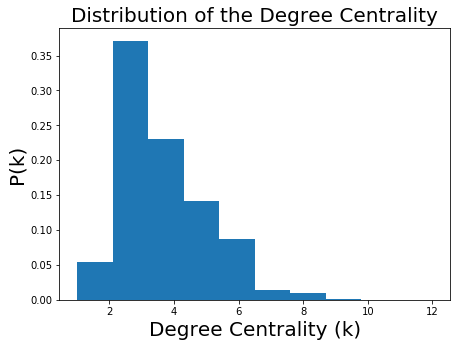

In [51]:
#[i] Degree Histogram
plot_degree_hist(Second_City)

In [52]:
#[ii] Closeness Centrality Histogram
plot_closeness_hist(Second_City)

In [53]:
#[iii] Betweenness Centrality Histogram
plot_betweenness_hist(Second_City)

***Third_City***

In [54]:
#Pegando a rede da First_City para montar os histogramas
Third_City = nx.read_graphml("./DATA/data-cities/New_York.graphml.xml")
# leitura no drive do grupo : 
#Third_City =  nx.read_graphml("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/data-cities/New_York.graphml.xml", "id")
#plot_grafo(Third_City)

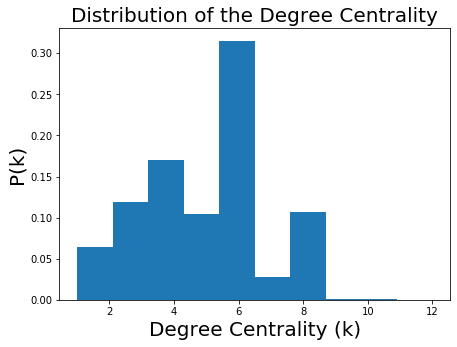

In [55]:
#[i] Degree Histogram
plot_degree_hist(Third_City)

In [56]:
#[ii] Closeness Centrality Histogram
plot_closeness_hist(Third_City)

In [57]:
#[iii] Betweenness Centrality Histogram
plot_betweenness_hist(Third_City)

***Fourth_City***

In [58]:
#Pegando a rede da First_City para montar os histogramas
Fourth_City = nx.read_edgelist("./DATA/data-cities/road-minnesota.mtx")
# leitura no drive do grupo :
#Fourth_City =  nx.read_graphml("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/data-cities/New_York.graphml.xml", "id")
#plot_grafo(Fourth_City)

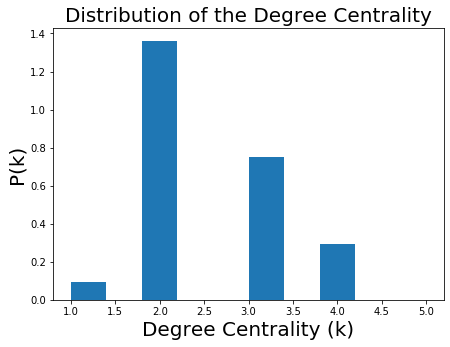

In [59]:
#[i] Degree Histogram
plot_degree_hist(Fourth_City)

In [60]:
#[ii] Closeness Centrality Histogram
plot_closeness_hist(Fourth_City)

In [61]:
#[iii] Betweenness Centrality Histogram
plot_betweenness_hist(Fourth_City)

***Discução e interpretação dos resultados*** 

> Vemos que as distribuição de grau demonstram a proporção de conexões sobre o total dos nós da rede, com isso em mente a cidade X apresenta uma distribuição favoral ao trafego ja que a curva tende ao alto numero deconexões média. Já com o histograma da Centralidade em Proximidade ......



# **Questão 3**

In [62]:
#Funções utilizadas para a resolução do exercício

#função para plotar o histograma da dos valores da centralidade de grau para cada vértice
def plot_degree_hist(G):
    #obtendo-se uma lista com os valores das centralidades de grau de cada vértice da rede G
    d = dict(G.degree())
    d = list(d.values())
    #rotina para plotar-se o histograma de d
    plt.figure(figsize=(7,5))
    plt.hist(d, density=True)
    plt.title("Distribution of the Degree Centrality", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.xlabel("Degree Centrality (k)", fontsize=20)
    plt.show(True)
    
#função para plotar o histograma da dos valores da closeness centrality para cada vértice
def plot_closeness_hist(G):
    #obtendo-se a lista dos valores de closeness centrality de cada vértice da rede G
    CLC = dict(nx.closeness_centrality(G)) 
    CLC = list(CLC.values())
    #rotina para plotar-se o histograma de CLC
    plt.figure(figsize=(7,5))
    plt.hist(CLC, density=True)
    plt.title("Distribution of the Closeness Centrality", fontsize=20)
    plt.ylabel("P(CLC)", fontsize=20)
    plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
    plt.show(True)
     
#função para plotar o histograma da dos valores da eigenvector centrality para cada vértice
def plot_eigenvector_hist(G):
    #obtendo-se a lista dos valores de eigenvector centrality de cada vértice da rede G
    EC = dict(nx.eigenvector_centrality(G, max_iter = 1000)) #eigenvector centrality com 1000 como nùmero máximo de iterações
    EC = list(EC.values())
    #rotina para plotar-se o histograma de EC
    plt.figure(figsize=(7,5))
    plt.hist(EC, density=True)
    plt.title("Distribution of the Eigenvector Centrality", fontsize=20)
    plt.ylabel("P(EC)", fontsize=20)
    plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
    plt.show(True)

#função para plotar o histograma da dos valores da pagerank para cada vértice
def plot_pagerank_hist(G):
    #obtendo-se a lista dos valores de pagerank de cada vértice da rede G
    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())
    #rotina para plotar-se o histograma de PR
    plt.figure(figsize=(7,5))
    plt.hist(PR, density=True)
    plt.title("Distribution of the Pagerank", fontsize=20)
    plt.ylabel("P(PR)", fontsize=20)
    plt.xlabel("Pagerank (PR)", fontsize=20)
    plt.show(True)

**a)** Human	protein	network

In [5]:
#lendo-se a rede humana de proteínas
HumanPN = nx.read_edgelist("./DATA/maayan-vidal/out.maayan-vidal", nodetype=int,comments  = "%")

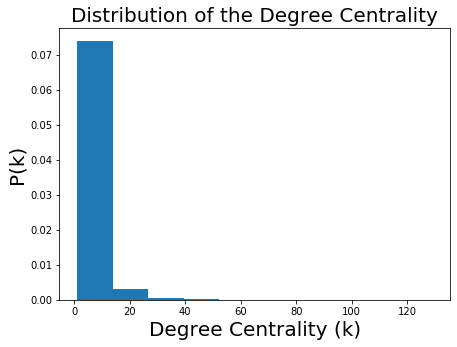

In [64]:
#[i] Degree
plot_degree_hist(HumanPN)

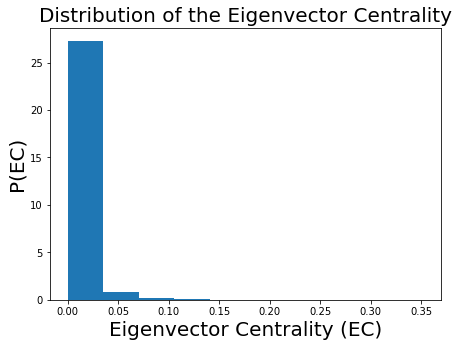

In [65]:
#[ii] Eigenvector Centrality
plot_eigenvector_hist(HumanPN)

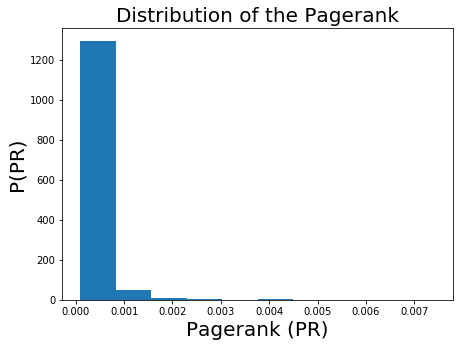

In [66]:
#[iii] Pagerank
plot_pagerank_hist(HumanPN)

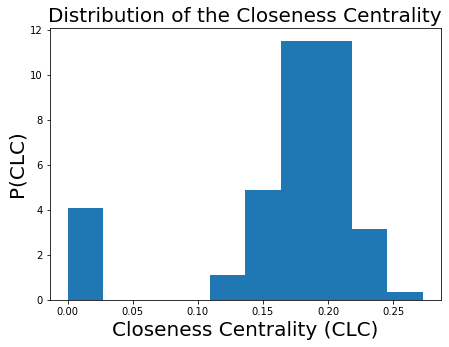

In [67]:
#[iv] Closeness Centrality
plot_closeness_hist(HumanPN)

**b)** C.	elegans	protein	network	2007

In [68]:
#lendo-se a rede de proteínas do nematódeo C. Elegans (2007)
prtnNtS = nx.read_edgelist("./DATA/wi2007.txt", nodetype=str,comments  = "%")
#leitura no drie do grupo:
#prtnNtS = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/wi2007.txt", nodetype=str,comments  = "%")
#plot_grafo(prtnNtS)

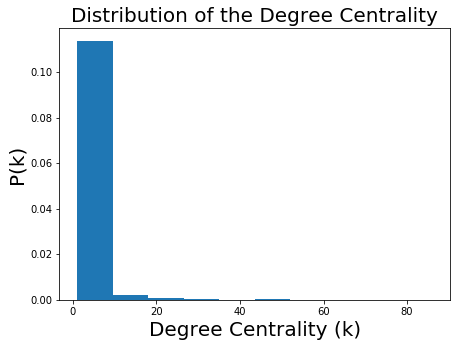

In [69]:
#[i] Degree
plot_degree_hist(prtnNtS)

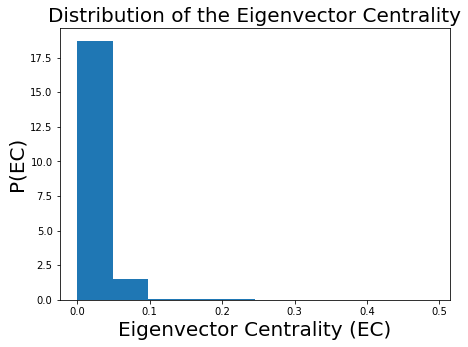

In [70]:
#[ii] Eigenvector Centrality
plot_eigenvector_hist(prtnNtS)

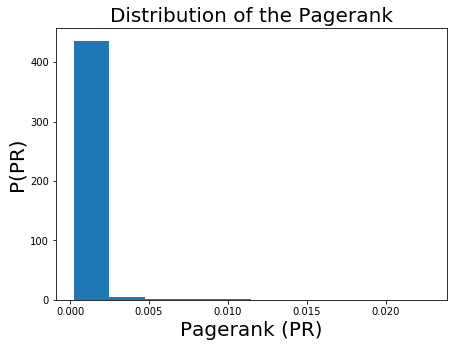

In [71]:
#[iii] Pagerank
plot_pagerank_hist(prtnNtS)

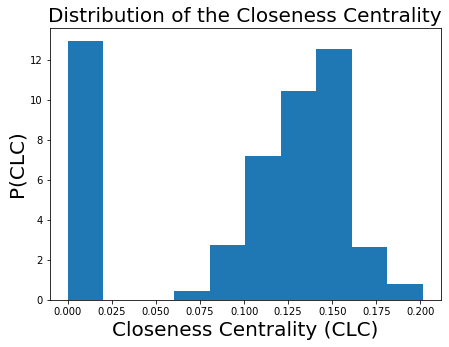

In [72]:
#[iv] Closeness Centrality
plot_closeness_hist(prtnNtS)

**c)** 	C.	elegans	protein	network	2004

In [73]:
#lendo-se a rede de proteínas do nematódeo C. Elegans (2004)
prtnNtF = nx.read_edgelist("DATA/wi2004.txt", nodetype=str,comments  = "%")

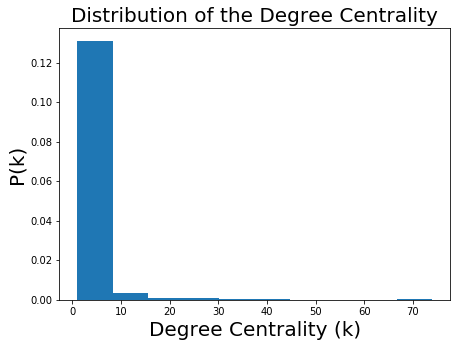

In [74]:
#[i] Degree
plot_degree_hist(prtnNtF)

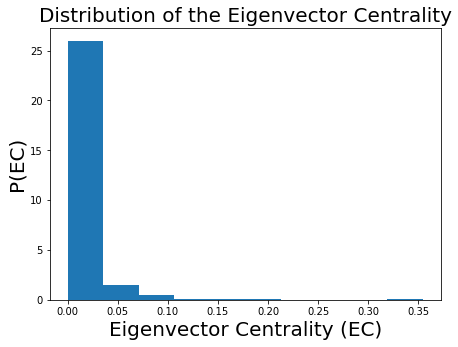

In [75]:
#[ii] Eigenvector Centrality
plot_eigenvector_hist(prtnNtF)

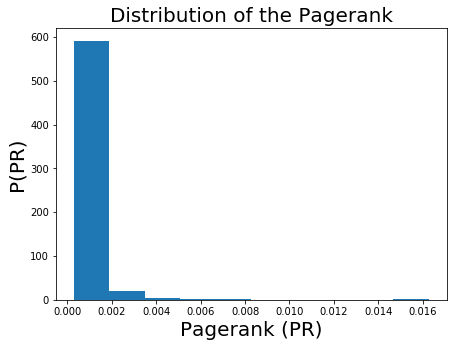

In [76]:
#[iii] Pagerank
plot_pagerank_hist(prtnNtF)

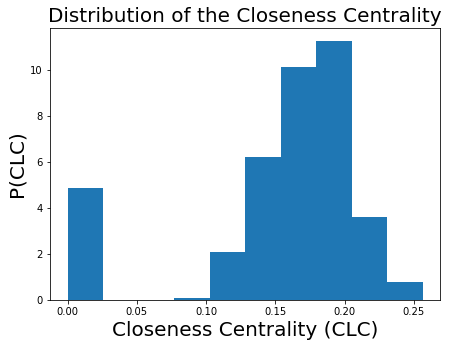

In [77]:
#[iv] Closeness Centrality
plot_closeness_hist(prtnNtF)

**d)** Western	US	power	grid

In [78]:
#lendo-se a rede Western US power grid
UsPwrGrd = nx.read_gml("./DATA/power.gml", "id")

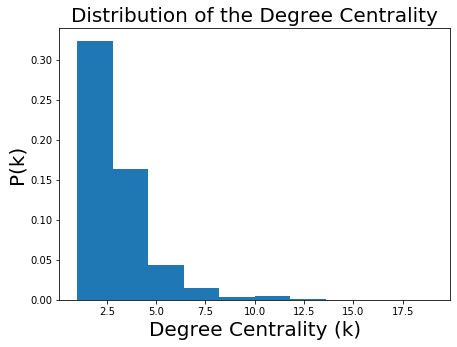

In [79]:
#[i] Degree
plot_degree_hist(UsPwrGrd)

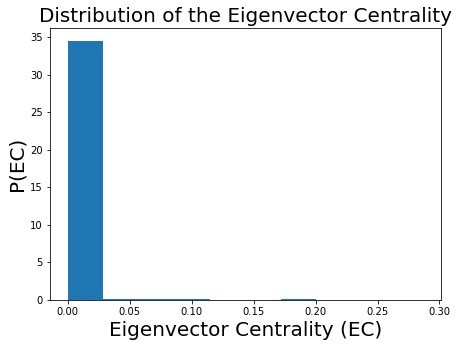

In [80]:
#[ii] Eigenvector Centrality
plot_eigenvector_hist(UsPwrGrd)

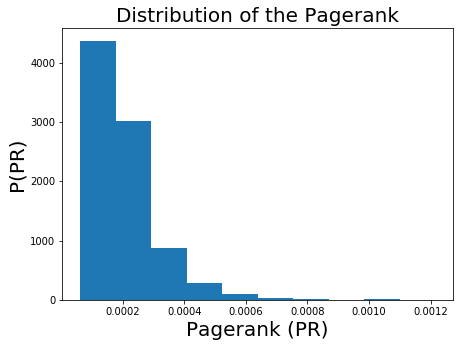

In [81]:
#[iii] Pagerank
plot_pagerank_hist(UsPwrGrd)

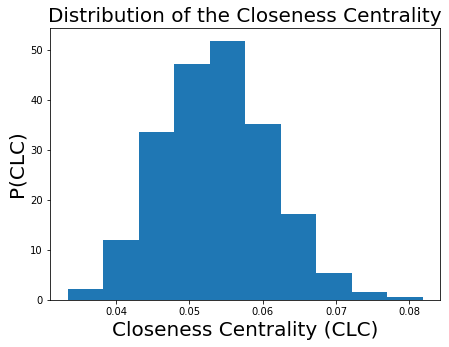

In [82]:
#[iv] Closeness Centrality
plot_closeness_hist(UsPwrGrd)

**e)** R	dependency	network

In [83]:
#lendo-se a rede R dependency network

dependencias_data = open('./DATA/dependencies.csv', "r")
next(dependencias_data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

dpndncyNt = nx.parse_edgelist(dependencias_data, delimiter=',', create_using=Graphtype,
                      nodetype=str)

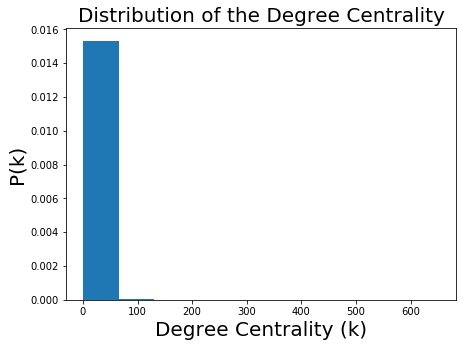

In [84]:
#[i] Degree
plot_degree_hist(dpndncyNt)

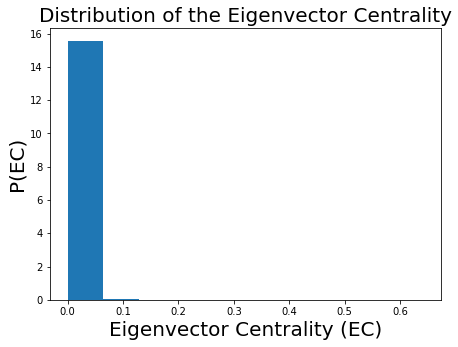

In [85]:
#[ii] Eigenvector Centrality
plot_eigenvector_hist(dpndncyNt)

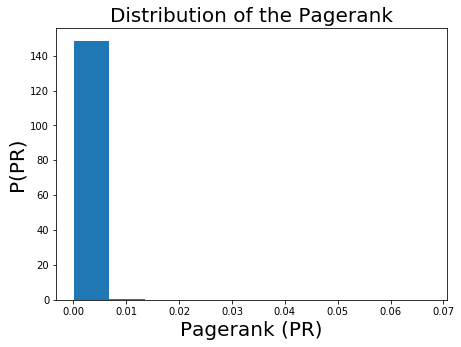

In [86]:
#[iii] Pagerank
plot_pagerank_hist(dpndncyNt)

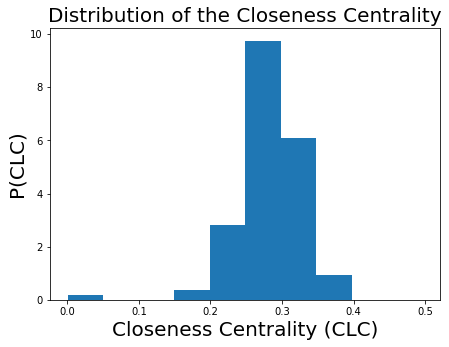

In [87]:
#[iv] Closeness Centrality
plot_closeness_hist(dpndncyNt)

***Are there similarities between networks of the same type, such as among technological or biological networks?*** 

> Indented block



# **Questão 4**

In [3]:
#Funções utilizadas para a resolução do exercício
def pre_processing_network (G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G = Gcc[0]
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    N = len(G)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    return G

def features_degree(G) :
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.asarray(vk)
    average_ = np.mean(vk)
    standard_ = np.std(vk)
    moment_2_ = moment(vk, 2)
    entropy_ = entropy(vk)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_kcore(G) :
    KC = dict(nx.core_number(G)) 
    KC = list(KC.values())
    KC = np.asarray(KC)
    average_ = np.mean(KC)
    standard_ = np.std(KC)
    moment_2_ = moment(KC, 2)
    entropy_ = entropy(KC)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_
 
def features_closeness(G) :
    CLC = dict(nx.closeness_centrality(G)) 
    CLC = list(CLC.values()) 
    CLC = np.asarray(CLC)
    average_ = np.mean(CLC)
    standard_ = np.std(CLC)
    moment_2_ = moment(CLC, 2)
    entropy_ = entropy(CLC)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_betweenness(G) :
    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    B = np.asarray(B)
    average_ = np.mean(B)
    standard_ = np.std(B)
    moment_2_ = moment(B, 2)
    entropy_ = entropy(B)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_eingenvector(G) :
    EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))  
    EC = list(EC.values())
    EC = np.asarray(EC)
    average_ = np.mean(EC)
    standard_ = np.std(EC)
    moment_2_ = moment(EC, 2)
    entropy_ = entropy(EC)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_pageRank(G) :
    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())
    PR = np.asarray(PR)
    average_ = np.mean(PR)
    standard_ = np.std(PR)
    moment_2_ = moment(PR, 2)
    entropy_ = entropy(PR)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def rw_accessibility(G):
    N = len(G)
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = zeros((N,N), dtype = 'float')
    for i in np.arange(0,N):
        for j in np.arange(0,N):
            P[i,j] = A[i,j]/vk[i]
    type(P)
    print(P)
    P = P[~np.isnan(P)]
    print(P)
    W = expm(P)
    P2 = W/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N): 
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j]) 
        acc = np.exp(-acc)
        vacc[i] = acc 
    return vacc

def features_rwAccessibility(G) :
    ACC = list(rw_accessibility(G))
    print(ACC)
    ACC = np.asarray(ACC)
    average_ = np.mean(ACC)
    standard_ = np.std(ACC)
    moment_2_ = moment(ACC, 2)
    entropy_ = entropy(ACC)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_communicability(G) :
    communicability = list(communicability_centrality (G))
    communicability = np.asarray(communicability)
    average_ = np.mean(communicability)
    standard_ = np.std(communicability)
    moment_2_ = moment(communicability, 2)
    entropy_ = entropy(communicability)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_

def features_communicability(G) :
    communicability = list(communicability_centrality (G))
    communicability = np.asarray(communicability)
    average_ = np.mean(communicability)
    standard_ = np.std(communicability)
    moment_2_ = moment(communicability, 2)
    entropy_ = entropy(communicability)
    list_ = [average_, standard_, moment_2_, entropy_]
    return list_



def communicability_centrality (G):
    N = len(G) 
    A = nx.adjacency_matrix(G).toarray()
    A_ = expm(A) 
    vcom = np.zeros(N, dtype = float)
    for i in np.arange(0,N):
        vcom[i] = A_[i,i] 
    return vcom

def features_network (G) :
    return features_degree(G) + features_kcore(G) + features_closeness(G) \
    + features_betweenness(G) + features_eingenvector(G) + features_pageRank(G) \
    + features_rwAccessibility(G) + features_communicability(G)

def pca_networks (X: np.ndarray) -> np.ndarray:
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)
    return principal_components 

**a)** Human	protein	network

In [6]:
G_human = pre_processing_network(HumanPN)
frwa = features_rwAccessibility(HumanPN)
# features_human = features_network(HumanPN)
# features_human = np.asarray(features_human)
# features_human = np.reshape(features_human, (1, 32))

Number of nodes: 2783
Number of edges: 6007
[[0.0212766  0.0212766  0.0212766  ... 0.         0.         0.        ]
 [0.16666667 0.         0.         ... 0.         0.         0.        ]
 [0.5        0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]]
[0.0212766 0.0212766 0.0212766 ... 0.        1.        0.       ]


ValueError: expected a square matrix

**b)** C.	elegans	protein	network	2007

In [ ]:
G_elegans2008 = pre_processing_network(prtnNtS)
prtnNtS.remove_edges_from(nx.selfloop_edges(prtnNtS))
features_elegans2007 = features_network(prtnNtS)
features_elegans2007 = np.asarray(features_elegans2007)
features_elegans2007 = np.reshape(features_elegans2007, (1, 32))

**c)** 	C.	elegans	protein	network	2004

In [ ]:
G_elegans2004 = pre_processing_network(prtnNtF)
prtnNtF.remove_edges_from(nx.selfloop_edges(prtnNtF))
features_elegans2004 = features_network(prtnNtF)
features_elegans2004 = np.asarray(features_elegans2004)
features_elegans2004 = np.reshape(features_elegans2004, (1, 32))

**d)** Western	US	power	grid

In [ ]:
G_power = pre_processing_network(UsPwrGrd)
UsPwrGrd.remove_edges_from(nx.selfloop_edges(UsPwrGrd))
features_powergrid = features_network(UsPwrGrd)
features_powergrid = np.asarray(features_powergrid)
features_powergrid = np.reshape(features_powergrid, (1, 32))

**e)** R	dependency	network

In [ ]:
G_dependencies = pre_processing_network(dpndncyNt)
dpndncyNt.remove_edges_from(nx.selfloop_edges(dpndncyNt))
features_dependencies = features_network(dpndncyNt)
features_dependencies = np.asarray(features_dependencies)
features_dependencies = np.reshape(features_dependencies, (1, 32))

***Discuss the similarities of the networks in terms of their features*** 

In [ ]:
X = np.concatenate((features_human, features_elegans2007, features_powergrid,features_elegans2004, features_dependencies))
principal_components = pca_networks(X)

> Indented block

# **Questão 5**

In [27]:
#Funções utilizadas para a resolução do exercício
def plot_knn_k(G):
    knn = []
    k = []
    for i in G.nodes():
        aux =  nx.k_nearest_neighbors(G, nodes = [i])
        aux = list(aux)
        knn.append(aux)
        k.append(i)
    knn = np.array(knn)
    
    # Plot
    plt.figure(figsize=(16,9));
    plt.scatter(k, knn,alpha=1)
    plt.title('knn(k) x k')
    plt.xlabel('k')
    plt.ylabel('Knn')
    plt.show()
    print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

**a)** 	E-road	network

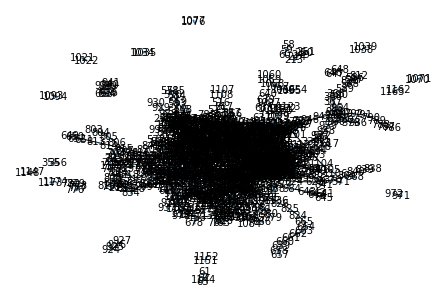

In [10]:
road = nx.read_edgelist("./DATA/subelj_euroroad/out.subelj_euroroad_euroroad", nodetype=int , comments  = "%")
plot_grafo(road) # rede de malha rodovíaria europeia

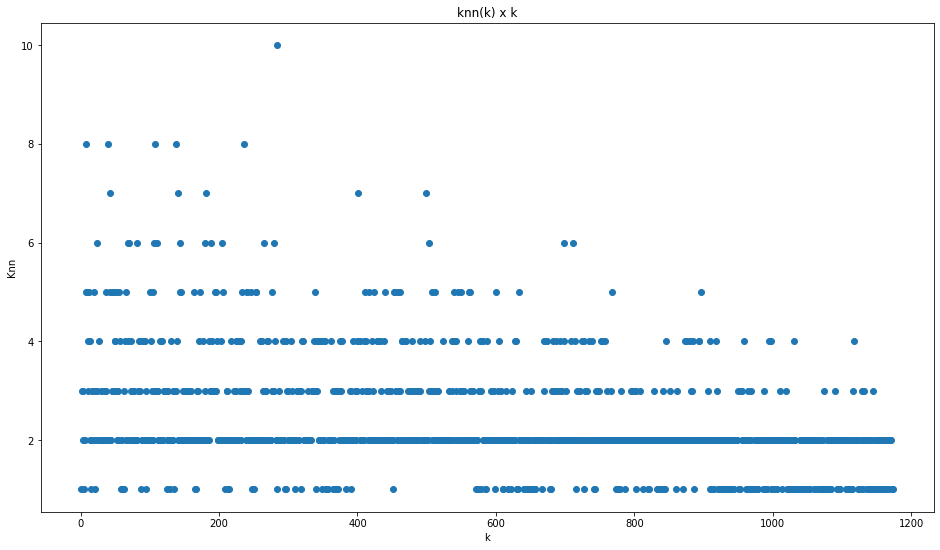

Average degree of the neighborhood of the network: 2.41


In [28]:
plot_knn_k(road)

In [29]:
nx.degree_pearson_correlation_coefficient(road)

0.12668357398536279

In [30]:
nx.degree_assortativity_coefficient(road)

0.1266835739853625

**b)** C.	elegans	neural	network

In [ ]:
neural =nx.read_gml("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/celegansneural.gml", data=(('id','label'),))
plot_grafo(neural)# rede de malha rodovíaria europeia

**c)** 		US	airport	network

In [ ]:
usairport = nx.read_weighted_edgelist("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/USairport500.txt", nodetype=int, comments= "%")
plot_grafo(usairport)

**d)** Human	protein	network

In [ ]:
HumanPN =  nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/Projeto 2/DATA/maayan-vidal/out.maayan-vidal", nodetype=int,comments  = "%")
plot_grafo(HumanPN) #rede humana de proteínas

***Comment the results*** 

> Indented block



# **Questão 6**

In [ ]:
#Funções utilizadas para a resolução do exercício


***Use the normalized mutual information as a measure of accuracy.*** 

> Indented block



# **Questão 7**

In [ ]:
#Funções utilizadas para a resolução do exercício

#Arrumando a rede para o processar os metodos para identificação de comunidade:
def pre_processing_network (G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G = Gcc[0]
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    N = len(G)
    M = G.number_of_edges()
    return G, N

In [ ]:
G = nx.karate_club_graph()
G, N = pre_processing_network(G)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_size=500, font_size=16)

In [ ]:
#Netcarto method:(betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
#Informap method:(betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
#Fastgreedy method: (betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
#Label propagation method:(betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
#Louvain method: (betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
#Girvan-Newman method: (betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0

nx.draw_networkx(G, pos=pos, node_color = 'k')
for var in c:
    nx.draw_networkx_nodes(G, pos, var, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
c = list(greedy_modularity_communities(G))
colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


c = list(label_propagation_communities(G))


colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
nx.draw_networkx(G, pos=pos, node_color = 'k')
for c_ in c:
    nx.draw_networkx_nodes(G, pos, c_, node_size = 250, 
                           node_color = colors[aux], with_labels = True)
    aux = aux + 1
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

***Show the partition of the Zachary karate club for these networks*** 

> Indented block



# **Questão 8**

In [ ]:
#Funções utilizadas para a resolução do exercício

def benchmark_labels (G_benchmark_graph):
    communities = {frozenset(G_benchmark_graph.nodes[v]['community']) for v in G_benchmark_graph}
    p = ([list(x) for x in communities])

    partition_communities = {}
    for i in range(len(p)):
        for j in range(len(p[i])):
            partition_communities[p[i][j]] = i 
    
    matrix_values = np.zeros((len(partition_communities)))
    
    for i in range(len(partition_communities)):
        matrix_values[i] = partition_communities[i]
    return matrix_values

def best_girvanNewman (G):
    modul = []
    comp = community.girvan_newman(G)
    com_ = []
    for communities in comp:
        modul.append(nx_comm.modularity(G, communities))
        com_.append(communities)
    best_pos = np.argmax(modul)
    return com_[best_pos]

def girvan_newman_labels (p):
    p = [list(x) for x in p]

    partition_girvan = {}
    for i in range(len(p)):
        for j in range(len(p[i])):
            partition_girvan[p[i][j]] = i 
    
    matrix_values_girvan = np.zeros((len(partition_girvan)))
    
    for i in range(len(partition_girvan)):
        matrix_values_girvan[i] = partition_girvan[i]
    return matrix_values_girvan

def louvain_labels(G):
    partition_louvain = community_louvain.best_partition(G)
    matrix_values_louvain = np.zeros((len(partition_louvain)))
    
    for i in range(len(partition_louvain)):
        matrix_values_louvain[i] = partition_louvain[i]
    return matrix_values_louvain

def greedy_labels(G):
    p = greedy_modularity_communities(G)

    p = ([list(x) for x in p])

    partition_greedy = {}
    for i in range(len(p)):
        for j in range(len(p[i])):
            partition_greedy[p[i][j]] = i
    
    matrix_values_greedy = np.zeros((len(partition_greedy)))
    
    for i in range(len(partition_greedy)):
        matrix_values_greedy[i] = partition_greedy[i]
    return matrix_values_greedy

def labelPropagation_labels (G):
    p = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    p = ([list(x) for x in p])

    partition_label = {}
    for i in range(len(p)):
        for j in range(len(p[i])):
            partition_label[p[i][j]] = i 
    
    matrix_values_label = np.zeros((len(partition_label)))
    
    for i in range(len(partition_label)):
        matrix_values_label[i] = partition_label[i]
    return matrix_values_label

In [ ]:
N = 1000
tau1 = 2.5
tau2 = 1.1
mu = 0.50
#k =16
minc = 20
maxc = 100

points_x = []
points_y = []

for mu in np.arange (0.05, 1.0, 0.02):
    G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = 5, max_degree = 20, min_community=minc, max_community = maxc, seed = 10)
    matrix_values = benchmark_labels(G)
    n_col = np.shape(matrix_values)[0]
    labels_final = np.zeros((4, n_col))
    labels_final[0] = louvain_labels(G)
    labels_final[1] = greedy_labels(G)
    labels_final[2] = labelPropagation_labels(G)
    best_com = best_girvanNewman (G)
    labels_final[3] = girvan_newman_labels(best_com)
    
    matrix_NMI = np.zeros((4))
    for i in range(4):
        matrix_NMI[i] = round(normalized_mutual_info_score(matrix_values, labels_final[i]), 10)
        if matrix_NMI[i] > 1 or matrix_NMI[i] < 0 : matrix_NMI[i] = 0

    points_x.append(mu)
    points_y.append(matrix_NMI)
    
points_y = np.asmatrix(points_y)
#points_y = pd.DataFrame(points_y, columns = ["Louvain", "FastGreedy", "Label_propagation"]) 
points_y = pd.DataFrame(points_y, columns = ["Louvain", "FastGreedy", "Label_propagation", "Girvan_Newman"])  


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Mu', fontsize = 15)
ax.set_ylabel('NMI', fontsize = 15)
ax.set_title('NMI for different Methods of Modularity', fontsize = 20)
targets = ["Louvain", "FastGreedy","Label_propagation", "Girvan_Newman"]
#targets = ["Louvain", "FastGreedy","Label_propagation"]
colors = ['r', 'g', 'b', 'y', 'k']

ax.plot(points_x ,points_y["FastGreedy"], color = 'r')
ax.plot(points_x ,points_y["Label_propagation"], color = 'b')
ax.plot(points_x ,points_y["Louvain"], color = 'g')
ax.plot(points_x ,points_y["Girvan_Newman"], color = 'y')
ax.legend(targets)
ax.grid()

***Show the comparison as bellow for networks with N=1000 nodes*** 

> Indented block



# **Questão 9**

In [ ]:
#Funções utilizadas para a resolução do exercício

def pre_processing_network (G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G = Gcc[0]
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    N = len(G)
    M = G.number_of_edges()
    return G

def average_degree(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.asarray(vk)
    average_ = np.mean(vk)
    return average_

def average_shortest_path_network(G):
    if nx.is_connected(G) == True:
        l = nx.average_shortest_path_length(G)
        return l
    else:
        print("The graph has more than one connected component")
        return 0

def louvain_communities (G):
    partition = community_louvain.best_partition(G)
    louvain_test_values = partition.values()
    louvain_test_values = list(louvain_test_values)
    louvain_test_keys = partition.keys()
    louvain_test_keys = list(louvain_test_keys)
    df_test = pd.DataFrame(data = {'node': louvain_test_keys, 'community': louvain_test_values})
    list_com = list(df_test['community'].unique())
    com = []
    for i in range(0, len(list_com)):
        com.append(list(df_test[df_test['community'] == i]['node']))
    return com

def modularity_girvanNewman (G):
    modul = []
    comp = community.girvan_newman(G)
    for communities in comp:
        modul.append(nx_comm.modularity(G, communities))
    return np.max(modul)

**a)** 	E-road	network

In [ ]:
G_euro = nx.read_edgelist("euroroad/subelj_euroroad/out.txt")
G_euro = pre_processing_network(G_euro)

#N, Average degree, assortativity coefficient, average shortest path length, modularity
N_euro = len(G_euro)
degree_euro = average_degree(G_euro)
assortativity_euro = nx.degree_assortativity_coefficient(G_euro)
l_euro = average_shortest_path_network(G_euro)

#(i) Fastgreedy
greedy_euro = list(greedy_modularity_communities(G_euro))
modularity_euro_g = nx_comm.modularity(G_euro, greedy_euro)

#(ii) Label propagation 
label_euro = list(label_propagation_communities(G_euro))
modularity_euro_label = nx_comm.modularity(G_euro, label_euro)

#(iii) Givan Newman 
modularity_euro_newman = modularity_girvanNewman(G_euro)

#(iv) Louvain
modularity_euro_louvain = nx_comm.modularity(G_euro, louvain_communities(G_euro))

**b)** C.	elegans	neural	network

In [ ]:
G_elegansNN = nx.read_edgelist("ElegansNet.txt")
G_elegansNN = pre_processing_network(G_elegansNN)

#N, Average degree, assortativity coefficient, average shortest path length, modularity
N_elegansNN = len(G_elegansNN)
degree_elegansNN = average_degree(G_elegansNN)
assortativity_elegansNN = nx.degree_assortativity_coefficient(G_elegansNN)
l_elegansNN = average_shortest_path_network(G_elegansNN)

#(i) Fastgreedy
greedy_elegansNN = list(greedy_modularity_communities(G_elegansNN))
modularity_elegansNN_g = nx_comm.modularity(G_elegansNN, greedy_elegansNN)

#(ii) Label propagation 
label_elegansNN = list(label_propagation_communities(G_elegansNN))
modularity_elegansNN_label = nx_comm.modularity(G_elegansNN, label_elegansNN)

#(iii) Givan Newman 
modularity_elegansNN_newman = modularity_girvanNewman(G_elegansNN)

#(iv) Louvain
modularity_elegansNN_louvain = nx_comm.modularity(G_elegansNN, louvain_communities(G_elegansNN))

**c)** 		US	airport	network

In [ ]:
G_airport = nx.read_weighted_edgelist("USairport2010.txt")
G_airport = pre_processing_network(G_airport)
#N, Average degree, assortativity coefficient, average shortest path length, modularity
N_elegansNN = len(G_elegansNN)
#(i) Fastgreedy
greedy_euro = list(greedy_modularity_communities(G_euro))
modularity_euro_g = nx_comm.modularity(G_euro, greedy_euro)

#(ii) Label propagation 
label_euro = list(label_propagation_communities(G_euro))
modularity_euro_label = nx_comm.modularity(G_euro, label_euro)

#(iii) Givan Newman 
modularity_euro_newman = modularity_girvanNewman(G_euro)

#(iv) Louvain
modularity_euro_louvain = nx_comm.modularity(G_euro, louvain_communities(G_euro))

**d)** Human	protein	network

In [ ]:
G_human = nx.read_edgelist("download.tsv.maayan-vidal/maayan-vidal/out.txt")
G_human = pre_processing_network(G_human)

#N, Average degree, assortativity coefficient, average shortest path length, modularity
N_human = len(G_human)
degree_human = average_degree(G_human)
assortativity_human = nx.degree_assortativity_coefficient(G_human)
l_human = average_shortest_path_network(G_human)

#(i) Fastgreedy
greedy_euro = list(greedy_modularity_communities(G_euro))
modularity_euro_g = nx_comm.modularity(G_euro, greedy_euro)

#(ii) Label propagation 
label_euro = list(label_propagation_communities(G_euro))
modularity_euro_label = nx_comm.modularity(G_euro, label_euro)

#(iii) Givan Newman 
modularity_euro_newman = modularity_girvanNewman(G_euro)

#(iv) Louvain
modularity_euro_louvain = nx_comm.modularity(G_euro, louvain_communities(G_euro))

In [ ]:
#networks' properties table:
list_N = [N_euro, N_elegansNN, N_airport, N_human]
print("Number of nodes")
print(list_N)

In [ ]:
list_degree = [degree_euro, degree_elegansNN, degree_airport, degree_human]
print("Average degree:")
print(list_degree)

In [ ]:
list_assortativity = [assortativity_euro, assortativity_elegansNN, assortativity_airport, assortativity_human]
print("Assortativity:")
print(list_assortativity)

In [ ]:
list_l = [l_euro, l_elegansNN, l_airport, l_human]
print("Average shortest path length:")
print(list_l)

In [ ]:
list_modularity_greedy = [modularity_euro_g, modularity_elegansNN_g, modularity_airport_g, modularity_human_g]
print("Modularity Fastgreedy:")
print(list_modularity_greedy)

In [ ]:

list_modularity_label = [modularity_euro_label, modularity_elegansNN_label, modularity_airport_label, modularity_human_label]
print("Modularity Label Propagation:")
print(list_modularity_label)

In [ ]:
list_modularity_louvain = [modularity_euro_louvain, modularity_elegansNN_louvain, modularity_airport_louvain, modularity_human_louvain]
print("Modularity Louvain:")
print(list_modularity_louvain)

In [ ]:
list_modularity_newman = [modularity_euro_newman, modularity_elegansNN_newman, modularity_airport_newman, modularity_human_newman]
print("Modularity Girvan Newman")
print(list_modularity_newman)

In [ ]:
df_networks = pd.DataFrame(data = {'N':list_N,'average degree':list_degree, 'Assortativity': list_assortativity, 'Average shortest path length': list_l, 'Modularity Fastgreedy': list_modularity_greedy, 'Modularity Label propagation':list_modularity_label, 'Modularity Louvain': list_modularity_louvain, 'Modularity Girvan Newman': list_modularity_newman}, index =[' E-road network', 'C. elegans neural network', 'US airport network ', 'Human protein network '])

***Compare the results in terms of the modularity***

> Indented block

***Are there some relation between assortativity and other network measures?***

> Indented block

# **Questão 10**

# Problema proposto
#### Analise de duas redes sociais online de nichos diferentes.
# Redes
A primeira rede é composta por amizades mutuas entre o público da Twitch [link](twitch.tv) site de straeming de jogos.  ref: [Twitch Social Networks](https://snap.stanford.edu/data/twitch-social-networks.html)
<br>A segunda, é definida pelas amizades entre usuarios do Facebook. ref: [American](http://networkrepository.com/socfb-American75.php)
# Características
Ambas as redes são:
- Unidirecional
- Sem peso

Por quesões de padronização optou-se por selecionar as conexões de regiões proximas para descartar efeitos de cultura, com isso as regiões selecionadas contempladas no dataset são:

Na rede Facebook: American<br>
Na rede Twitch: Brasil


In [ ]:
facebook = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/Projeto 2/Facebook American/socfb-American75.mtx", nodetype=int,comments  = "%")

In [ ]:
plot_grafo(facebook)

In [ ]:
twitch = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/Projeto 2/twitch/PTBR/musae_PTBR_edges.csv", nodetype=int,comments  = "%", delimiter =',')
plot_grafo(twitch)

In [ ]:
redes = ['facebook','twitch']

Distribuição e histograma do grau

In [ ]:
ks,pk = degree_distribution(facebook,1)

In [ ]:
ks,pk = degree_distribution(twitch,1)

Distribuição e histograma do grau Escala de log

In [ ]:
ks,pk = degree_distribution_log(facebook,1)

In [ ]:
ks,pk = degree_distribution_log(twitch,1)

##Analise
Ao contrátio do presuposto a rede possui distribuição e histograma do grau similares desta forma usaremos assortatividades para mensurar a chance de conexão entre as redes utlizando a Assortatividade Grau-Grau e a correlação de Pearson para equiparar as redes de forma padronizada.

In [ ]:
facebook_assort=nx.degree_assortativity_coefficient(facebook)

In [ ]:
twitch_assort=nx.degree_assortativity_coefficient(twitch)

In [ ]:
facebook_pearson=nx.degree_pearson_correlation_coefficient(facebook)

In [ ]:
twitch_pearson = nx.degree_pearson_correlation_coefficient(twitch)

Assortatividade degree-degree

In [ ]:
twitch_assort


In [ ]:
facebook_assort

Assortatividade por correlação de Pearson

In [ ]:
twitch_pearson

In [ ]:
facebook_pearson

## Analise
Com a assortatividade tanto grau-grau quanto por correlação de pearson, tesmo que a rede **Facebook** se a tendências de redes sociais online, já a rede **Twitch** segue a tendência de redes tecnologicas e biológicas. ref: https://en.wikipedia.org/wiki/Assortativity e https://edisciplinas.usp.br/pluginfile.php/4962932/mod_resource/content/1/lecture4.pdf.<br>
A implicação das assortividades positivas é a tendencia de formar **Hub's** entre nós com caracteristicas semelhantes, já a tendência negativa é o oposto, contudo, analisaremos a conectividade através das métricas das médias dos caminhos mais curtos e analisar as comunidades.


Comprimento médio do caminho mais curto

In [ ]:
facebookSP = nx.average_shortest_path_length(facebook)
twitchSP = nx.average_shortest_path_length(twitch)

##Analise
Verificaremos as comunidades existentes em ambas as redes e analisar .....

Utilizando Louvain para obter a melhor partição de comunidade

In [ ]:
partition = community_louvain.best_partition(twitch)
pos=nx.spring_layout(twitch)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','t', 'h', 'v' , 'X', 'Z']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(twitch, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(twitch, pos, alpha=0.5)
plt.show()

In [ ]:
partition_face = community_louvain.best_partition(facebook)
pos=nx.spring_layout(facebook)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w',1,2,254,5 ,9,70,55.14,112,225]
size = float(len(set(partition_face.values())))
count = 0.
for com in set(partition_face.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_face.keys() if partition_face[nodes] == com]
    nx.draw_networkx_nodes(facebook, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(facebook, pos, alpha=0.5)
plt.show()

## Conclusão 
Mesmo contra as suposições em relação a semântica do dominio das redes temos que mesmo sendo extraidas de nichos diferentes seguem os padroes de tendências em conectar-se com excessão da assortividade que demonstra que a tendência da conexão no Facebook segue a tendência padrão em redes sociais enquanto o Twitch segue com a tendência em formar comunidades como youtube, devido a capacidades de formar nichos distintos e bem devfinos no campos de interresse no stream de vídeo, similar em redes com semantica entretenimento, respectivamente.                                    